In [8]:
import numpy as np
from astropy.timeseries import LombScargle
from maelstrom import Maelstrom
import importlib.metadata
import matplotlib.pyplot as plt
import arviz as az
import corner
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
print(importlib.metadata.version("maelstrom"))

In [9]:
data = np.loadtxt('KIC 3975085 flux 2.txt')
len(data)

47466

In [10]:
time = data[:,0]
flux = data[:,1]

In [11]:
modes_freq = np.array([10.613450, 7.637468])

In [13]:
ms = Maelstrom(time=time, flux=flux, freq=modes_freq)

In [15]:
td_time, td_tau = ms.get_time_delay()
np.savetxt("tdt.txt", td_time)
np.savetxt("tdd.txt", td_tau)

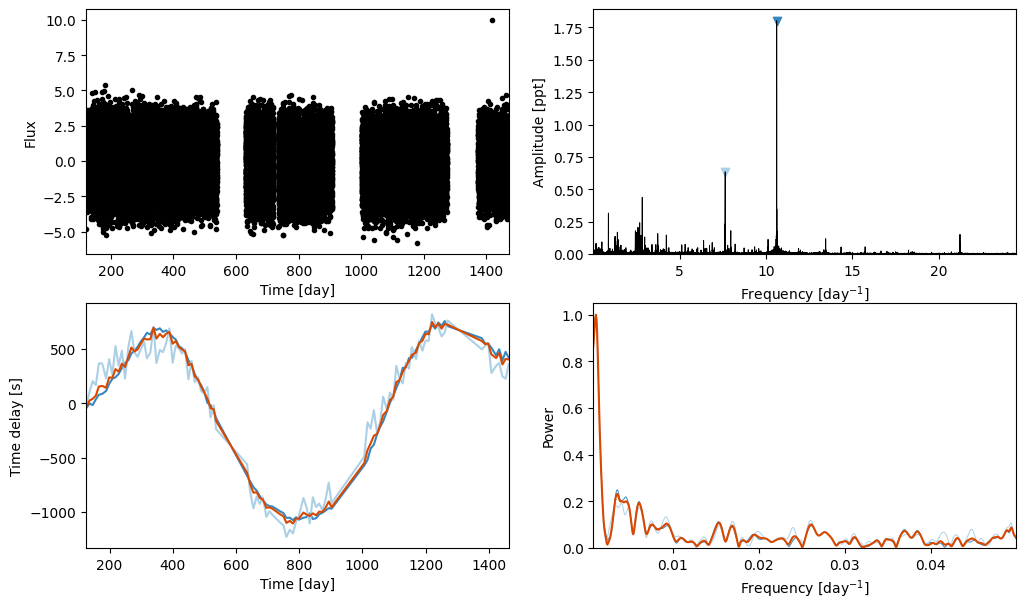

In [6]:
ms.first_look(segment_size=10.0)
plt.show()

In [7]:
ms.setup_orbit_model(period=921) 

In [8]:
pb = ms.pin_orbit_model()

In [9]:
opt_pb = pb.optimize()

optimizing logp for variables: [PB1_mean]


message: Optimization terminated successfully.
logp: -92539.75242434374 -> -92539.75238076206


optimizing logp for variables: [PB1_logs_lc]


message: Optimization terminated successfully.
logp: -92539.75238076206 -> -84524.91342975247
optimizing logp for variables: [PB1_omega, PB1_eccen]


message: Desired error not necessarily achieved due to precision loss.
logp: -84524.91342975247 -> -69896.53552932947
optimizing logp for variables: [PB1_phi]


message: Desired error not necessarily achieved due to precision loss.
logp: -69896.53552932947 -> -69876.07820654879
optimizing logp for variables: [PB1_lognu]


message: Desired error not necessarily achieved due to precision loss.
logp: -69876.07820654879 -> -69821.21027492514
optimizing logp for variables: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -69821.21027492514 -> -61496.6400672631
optimizing logp for variables: [PB1_logasini]


message: Optimization terminated successfully.
logp: -61496.6400672631 -> -61496.6400672631


optimizing logp for variables: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -61496.6400672631 -> -61496.6400672631
optimizing logp for variables: [PB1_logP]


message: Optimization terminated successfully.
logp: -61496.6400672631 -> -61496.6400672631


optimizing logp for variables: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -61496.6400672631 -> -61496.6400672631


In [10]:
with pb:
    trace = pb.sample(
        tune=3000, draws=5000,
        target_accept=0.9,
        chains=4, cores=4,
        init="adapt_diag",
        random_seed=42
    )

optimizing logp for variables: [PB1_mean]


message: Optimization terminated successfully.
logp: -61496.6400672631 -> -61496.6400672631


optimizing logp for variables: [PB1_logs_lc]


message: Optimization terminated successfully.
logp: -61496.6400672631 -> -61496.6400672631


optimizing logp for variables: [PB1_omega, PB1_eccen]


message: Optimization terminated successfully.
logp: -61496.6400672631 -> -61496.6400672631


optimizing logp for variables: [PB1_phi]


message: Optimization terminated successfully.
logp: -61496.6400672631 -> -61496.6400672631


optimizing logp for variables: [PB1_lognu]


message: Desired error not necessarily achieved due to precision loss.
logp: -61496.6400672631 -> -61496.6400672631
optimizing logp for variables: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -61496.6400672631 -> -61496.6400672631
optimizing logp for variables: [PB1_logasini]


message: Optimization terminated successfully.
logp: -61496.6400672631 -> -61496.6400672631


optimizing logp for variables: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -61496.6400672631 -> -61496.6400672631
optimizing logp for variables: [PB1_logP]


message: Optimization terminated successfully.
logp: -61496.6400672631 -> -61496.6400672631


optimizing logp for variables: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]


message: Desired error not necessarily achieved due to precision loss.
logp: -61496.6400672631 -> -61496.6400672631
C:\ProgramData\anaconda3\envs\pymc3\lib\site-packages\deprecat\classic.py:232: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [PB1_eccen, PB1_omega, PB1_lognu, PB1_mean, PB1_logasini, PB1_logs_lc, PB1_phi, PB1_logP]


Sampling 2 chains for 3_000 tune and 5_000 draw iterations (6_000 + 10_000 draws total) took 7978 seconds.
There were 119 divergences after tuning. Increase `target_accept` or reparameterize.
There were 213 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [11]:
idata = az.from_pymc3(trace=trace)
summary = az.summary(idata, hdi_prob=0.95)
print(summary)
summary.to_csv("summary.csv")

C:\ProgramData\anaconda3\envs\pymc3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


                 mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
PB1_logs_lc    -0.123  0.003    -0.129     -0.116      0.000    0.000   
PB1_mean       -0.000  0.004    -0.008      0.008      0.000    0.000   
PB1_lognu[0]    2.362  0.000     2.362      2.362      0.000    0.000   
PB1_lognu[1]    2.033  0.000     2.033      2.033      0.000    0.000   
PB1_logP        6.867  0.002     6.863      6.871      0.000    0.000   
PB1_period    960.137  2.072   956.095    964.140      0.033    0.024   
PB1_phi         2.663  0.119     2.430      2.889      0.003    0.002   
PB1_logasini    6.805  0.006     6.794      6.817      0.000    0.000   
PB1_asini     902.695  5.169   892.547    912.825      0.067    0.047   
PB1_nu[0]      10.613  0.000    10.613     10.613      0.000    0.000   
PB1_nu[1]       7.637  0.000     7.637      7.637      0.000    0.000   
PB1_omega      -1.077  0.122    -1.324     -0.850      0.003    0.002   
PB1_eccen       0.096  0.013     0.073      0.122  

In [41]:
P    = trace['PB1_period']        # = trace.get_values('PB1_period', combine=True, squeeze=True)
e    = trace['PB1_eccen']
asini= trace['PB1_asini']
omega= trace['PB1_omega']
phi  = trace['PB1_phi']

In [44]:
import numpy as np

data = [P, e, asini, omega, phi]
np.savetxt("PB1_arrays.txt", data, fmt="%.9f")

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import corner
import math


def _extract_1d_samples(obj, name):

    if obj is None:
        return None

    if hasattr(obj, "posterior"):
        x = obj.posterior[name].values
        return x.reshape(-1)

    if hasattr(obj, "get_values"):
        return obj.get_values(name, combine=True, squeeze=True)

    try:
        x = obj[name]
        return np.asarray(x).reshape(-1)
    except Exception:
        return None

def get_param(name):

    x = _extract_1d_samples(trace, name) if 'trace' in globals() else None
    if x is None and 'idata' in globals():
        x = _extract_1d_samples(idata, name)
    if x is None:
        raise KeyError("none")
    return np.asarray(x, dtype=float)

# ===== 取样本 =====
P     = get_param('PB1_period')      
asini = get_param('PB1_asini')      
e     = get_param('PB1_eccen')       
omega = get_param('PB1_omega')       
phi   = get_param('PB1_phi')        

omega_deg = np.degrees(omega) % 360.0

samples = np.vstack([P, asini, e, omega_deg, phi]).T

labels = [
    r"$P\ \mathrm{(d)}$",
    r"$a_1\sin i/c\ \mathrm{(s)}$",
    r"$e$",
    r"$\omega\ \mathrm{(deg)}$",
    r"$\phi\ \mathrm{(rad)}$",
]

ranges = None

角点图已保存为 corner_orbit_params.png


In [50]:
import numpy as np
import math
import corner
import matplotlib.pyplot as plt

def format_asymm(value, up, low):

    m = max(up, low)
    if m == 0 or not np.isfinite(m):
        return f"{value}"

    exp = math.floor(math.log10(m))
    first = m / (10**exp)
    sig = 2 if first < 3 else 1  # 1–3 → 两位；4–9 → 一位


    decimals = max(0, int(-(exp) + (sig - 1)))

    v  = round(value,  decimals)
    up = round(up,     decimals)
    low= round(low,    decimals)

    fmt = f"{{:.{decimals}f}}"
    return f"${fmt.format(v)}^{{+{fmt.format(up)}}}_{{-{fmt.format(low)}}}$"


fig = corner.corner(
    samples,
    labels=labels,
    bins=50,
    smooth=1.0,
    quantiles=[0.16, 0.50, 0.84],
    show_titles=False,        
    label_kwargs={"fontsize":10},
)

D = samples.shape[1]
axes = np.array(fig.axes).reshape(D, D)
for i in range(D):
    x = samples[:, i]
    q16, q50, q84 = np.quantile(x, [0.16, 0.50, 0.84])
    up  = q84 - q50
    low = q50 - q16
    title = f"{labels[i]} = {format_asymm(q50, up, low)}"
    axes[i, i].set_title(title, fontsize=9)

plt.savefig("corner_orbit_params_fmt.png", dpi=300, bbox_inches="tight")
plt.close(fig)


已保存：corner_orbit_params_fmt.png
